A* Pathfinding with Manhattan Distance
Route: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 5), (2, 5), (3, 5), (4, 5), (5, 5)]
Path Cost: 10
Is Optimal Path: True


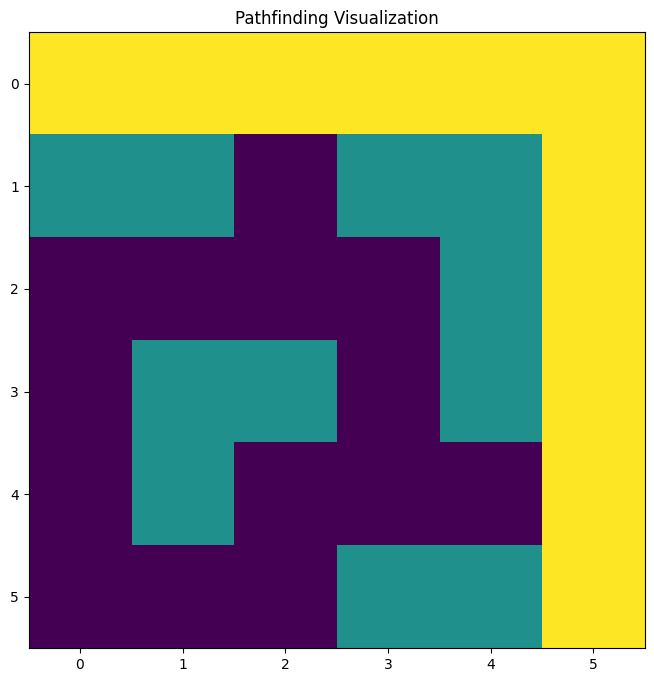

In [9]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

DIRECTIONS = [(1, 0), (-1, 0), (0, 1), (0, -1)]

def grid_distance(point_a, point_b):
    """Calculate Manhattan distance between two grid points"""
    return abs(point_a[0] - point_b[0]) + abs(point_a[1] - point_b[1])

def find_optimal_path(grid, origin, destination, distance_function):
   
    grid_height, grid_width = len(grid), len(grid[0])
    
    frontier = []
    heapq.heappush(frontier, (0 + distance_function(origin, destination), 
                             0, origin, [origin]))
    
    explored_nodes = set()

    while frontier:
        estimated_total, actual_cost, current_pos, current_path = heapq.heappop(frontier)

        if current_pos in explored_nodes:
            continue
        explored_nodes.add(current_pos)

        if current_pos == destination:
            return current_path, actual_cost

        for dx, dy in DIRECTIONS:
            next_x, next_y = current_pos[0] + dx, current_pos[1] + dy

            if (0 <= next_x < grid_height and 
                0 <= next_y < grid_width and 
                grid[next_x][next_y] != 1):
                
                new_cost = actual_cost + 1
                heuristic_estimate = distance_function((next_x, next_y), destination)
                heapq.heappush(frontier, (new_cost + heuristic_estimate, 
                                         new_cost, (next_x, next_y), 
                                         current_path + [(next_x, next_y)]))

    return None, float("inf")

def display_path_on_grid(grid, path):
    """Visualize the grid with the path highlighted"""
    grid_copy = np.array(grid)
    for (row, col) in path:
        if grid_copy[row][col] == 0:
            grid_copy[row][col] = 2  
    
    plt.figure(figsize=(8, 8))
    plt.imshow(grid_copy, cmap="viridis")
    plt.title("Pathfinding Visualization")
    plt.show()

maze_grid = [
    [0, 0, 0, 0, 0, 0],
    [1, 1, 0, 1, 1, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 1, 1, 0, 1, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 0]
]

start_point = (0, 0)  
target_point = (5,5)   

result_path, path_cost = find_optimal_path(maze_grid, start_point, target_point, grid_distance)
print("A* Pathfinding with Manhattan Distance")
print("Route:", result_path)
print("Path Cost:", path_cost)
print("Is Optimal Path:", path_cost == len(result_path) - 1)
display_path_on_grid(maze_grid, result_path)


A* Pathfinding with Scaled Manhattan Distance (1.5x)
Route: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 5), (2, 5), (3, 5), (4, 5), (5, 5)]
Path Cost: 10
Is Optimal Path: True


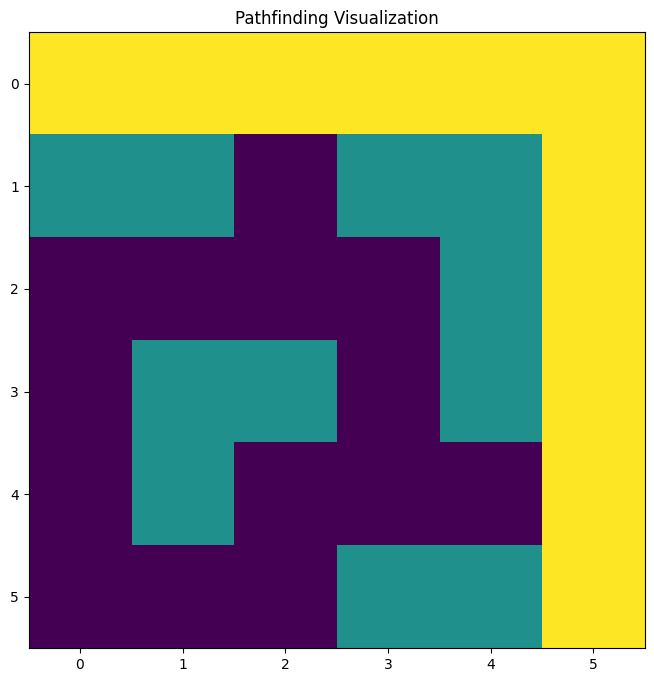

In [10]:
def scaled_grid_distance(point_a, point_b):
    """Calculate scaled Manhattan distance (1.5x multiplier)"""
    return 1.5 * grid_distance(point_a, point_b)

result_path, path_cost = find_optimal_path(maze_grid, start_point, target_point, scaled_grid_distance)
print("\nA* Pathfinding with Scaled Manhattan Distance (1.5x)")
print("Route:", result_path)
print("Path Cost:", path_cost)
print("Is Optimal Path:", path_cost == len(result_path) - 1)
display_path_on_grid(maze_grid, result_path)


A* Pathfinding with Inconsistent Heuristic
Route: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 5), (2, 5), (3, 5), (4, 5), (5, 5)]
Path Cost: 10
Is Optimal Path: True


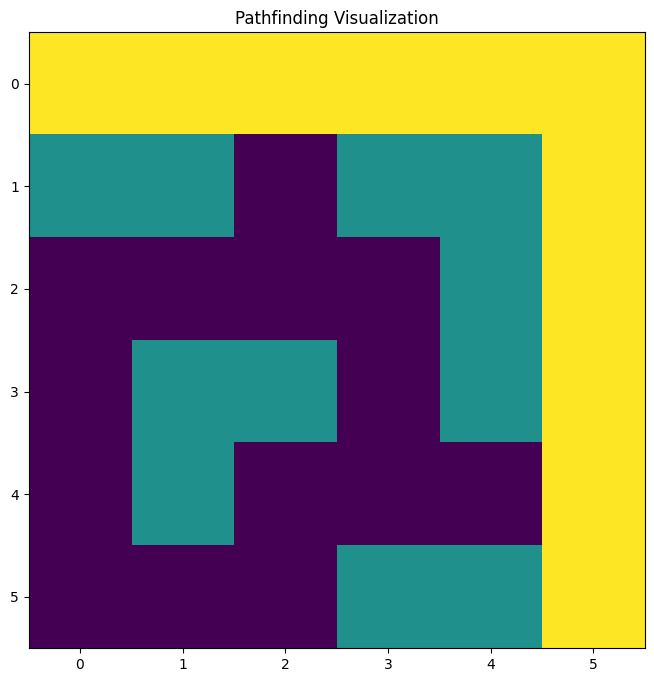

In [11]:
def inconsistent_grid_distance(point_a, point_b):
  
    distance = grid_distance(point_a, point_b)
    
    if point_a == (2, 2):  
        distance -= 2  
    
    return max(0, distance)

result_path, path_cost = find_optimal_path(maze_grid, start_point, target_point, inconsistent_grid_distance)
print("\nA* Pathfinding with Inconsistent Heuristic")
print("Route:", result_path)
print("Path Cost:", path_cost)
print("Is Optimal Path:", path_cost == len(result_path) - 1)
display_path_on_grid(maze_grid, result_path)